## Supervised Learning

### Classification
It is about predicting a class or discrete values. Ex: Male or Female; True or False.

### Regression
It is about predicting a quantity or countinuous values. Ex: Salary; Age; Price.


We're going to use
## XGBoost Regressor
A regression model based on decision trees, but with some improvements:

- Regression: it predicts continuous values (like house prices, temperature, etc.).
- Decision Tree: it makes predictions by following rules, like “if… else if… else…”.

So, the XGBoost Regressor is basically a forest of decision trees combined to predict continuous values.

It uses Boosting, a technique that creates trees one at a time, where each new tree tries to correct the errors made by the previous ones.

Importing the Dependencies:

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -- ------------------------------------- 3.1/56.8 MB 27.8 MB/s eta 0:00:02
   ---- ----------------------------------- 7.1/56.8 MB 19.3 MB/s eta 0:00:03
   ----------- ---------------------------- 16.3/56.8 MB 29.3 MB/s eta 0:00:02
   -------------------- ------------------- 28.8/56.8 MB 37.6 MB/s eta 0:00:01
   ----------------------------- ---------- 42.5/56.8 MB 44.2 MB/s eta 0:00:01
   ------------------------------------- -- 53.5/56.8 MB 45.2 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 37.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the California Dataset

In [8]:
house_price_data = fetch_california_housing(as_frame=True).frame # as_frame returns as a df from pandas
house_price_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# Check if number of rows and Columns in the data frame
house_price_data.shape

(20640, 9)

In [10]:
# Check for missing values
house_price_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
# Statistical Measures of the Dataset
house_price_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [13]:
correlation = house_price_data.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

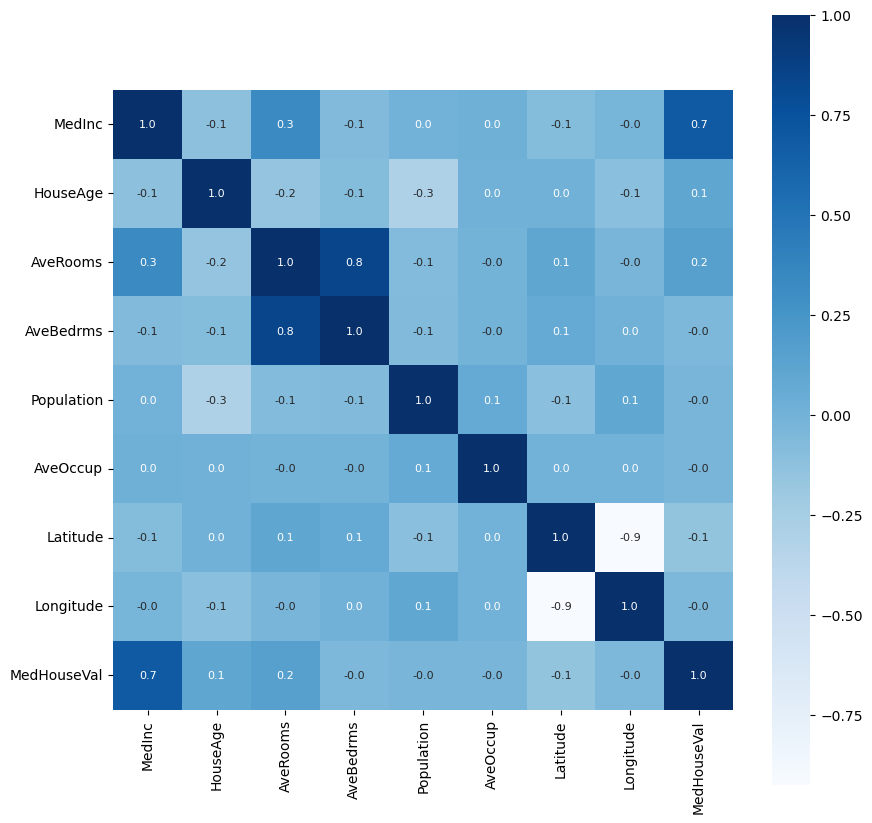

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',          
    annot=True,         
    annot_kws={'size': 8},  
    cmap='Blues'        
)

## Spliting the data and Target

In [19]:
X = house_price_data.drop(['MedHouseVal'], axis=1)
Y = house_price_data['MedHouseVal']

In [20]:
X, Y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

Splitting the data into Training Data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

## Model Training

In [27]:
# Loading the model
model = XGBRegressor()

In [28]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluation

### R² (R squared, coeficiente de determinação)

Measures how much of the real variation in the data the model can explain.

Ranges from 0 to 1:
- 0 → the model explains none of the variation.
- 1 → the model explains 100% of the variation.


### MAE (Mean Absolute Error)
Measures the average absolute error between the real and predicted values.
Interpretation: “on average, the model misses by ±X units.”

The smaller the MAE, the better the model’s predictions.

Prediction on training data:

In [29]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [31]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

score_1,score_2

(0.943650140819218, 0.1933648700612105)

In [32]:
training_data_prediction, Y_train

(array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
        0.6768683], dtype=float32),
 2072     0.720
 10600    2.741
 2494     0.583
 4284     2.000
 16541    1.179
          ...  
 1099     0.938
 18898    1.031
 11798    1.926
 6637     1.535
 2575     0.811
 Name: MedHouseVal, Length: 16512, dtype: float64)

Prediction on Test Data

In [33]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [34]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

score_1,score_2

(0.8338000331788725, 0.3108631800268186)

## Visualizing the actual Prices and predicted prices

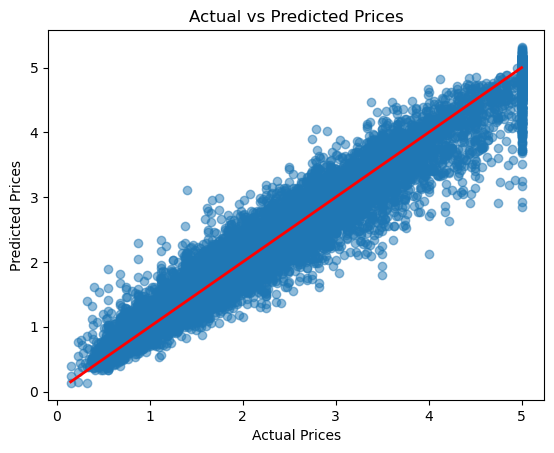

In [38]:
plt.scatter(Y_train, training_data_prediction, alpha=0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()